# Исследование продаж компьютерных игр

В нашем распоряжении исторические данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах за период до 2016 г.   

Необходимо выявить закономерности, которые определяют успешность компьютерной игры, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**ЗАКАЗЧИК -** интернет-магазин по продаже компьютерных игр.

**ЦЕЛЬ ИССЛЕДОВАНИЯ** - проверить гипотезы:

1.  Средние пользовательские рейтинги платформ "XOne" и "PC" одинаковые;
2.  Средние пользовательские рейтинги жанров "Action"  и "Sports" разные.


**ВХОДНЫЕ ДАННЫЕ**     

Данные о продаже игр получили из файла games.csv.

**ХОД ИССЛЕДОВАНИЯ**

О качестве данных ничего не известно. Поэтому перед исследованием данных и  проверкой гипотез понадобится их обзор. Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных. Таким образом, исследование пройдёт в пять этапов:

1. Обзор данных.
2. Предобработка данных.
3. Исследование данных.
4. Составление портрета пользователя каждого региона.
5. Проверка гипотез.

### Обзор данных

Импортируем необходимые библиотеки для работы с данными. Считаем данные из csv-файла в датафрейм и сохраним его в переменную `data`, выведем первые пять строк датафрейма на экран.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', None) # настроим отображение всех столбцов на экране

In [3]:
try:
    data = pd.read_csv('/datasets/games.csv')

except:
    data = pd.read_csv('games.csv')

# выводим первые 5 строк
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Сразу видим, что в данных есть проблемы.  
Для более детального знакомства выведем основную информацию о датафрейме с помощью метода info().

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов. Встречаются разные типы данных в столбцах: float64 и object. 

Согласно документации:   
**Name** — название игры;  
**Platform** — платформа;   
**Year_of_Release** — год выпуска;   
**Genre** — жанр игры;   
**NA_sales** — продажи в Северной Америке (миллионы проданных копий);   
**EU_sales** — продажи в Европе (миллионы проданных копий);   
**JP_sales** — продажи в Японии (миллионы проданных копий);   
**Other_sales** — продажи в других странах (миллионы проданных копий);   
**Critic_Score** — оценка критиков (максимум 100);   
**User_Score** — оценка пользователей (максимум 10);  
**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.   

В названиях колонок видны нарушения стиля, над которым нужно поработать.  
Некоторые типы данных не соответствуют заявленному описанию.  
Количество заполненных значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Выводы**   
В каждой строке таблицы - данные о компьютерной игре. Часть столбцов описывает саму игру: ее название, платформу, год выхода, жанр. Остальные данные раскрывают качественные характеристики игры: объем продаж и рейтинги.    
Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, с природой которых необходимо разобраться, несоответствие их типов, и в названиях колонок — расхождения с хорошим стилем. Данные проблемы нужно устранить.

### Предобработка данных

Исправим стиль в заголовках столбцов, исключим пропуски, проверим данные на дубликаты и артефакты, приведем данные к нужному типу.

#### Стиль заголовков

Выведем на экран названия столбцов:

In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведем к нижнему регистру названия всех столбцов с помощью метода *lower()*. Выведем обновленные названия на экран для проверки:

In [6]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Изучение и заполнение пропусков в данных

Определим в каких столбцах есть пропущенные значения и какова их доля. Отсортируем полученный результат в порядке убывания методом sort_values(), чтобы легко видеть каких пропусков больше.

In [7]:
data.isna().mean().sort_values(ascending=False)

critic_score       0.513192
rating             0.404786
user_score         0.400897
year_of_release    0.016093
name               0.000120
genre              0.000120
platform           0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

Пропущенных значений в датафрейме не мало. Большинство из них - в колонках, связанных с оценками компьютерных игр (доля таких значений составляет в пределах 40-51% по признаку). Также имеются незначительные пропуски в данных, характеризующих год выпуска игры и по 2 пропуска в ее названии и жанре. С целью понять природу пропусков изучим признаки более детально.

**critic_score**

Столбец `critic_score` более чем на половину состоит из пропусков.   
Проверим какие уникальные значения принимает признак:

In [8]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

Все показатели соответствуют документации, артефактов не выявлено.   
Отберем пропущенные значения по признаку и выведем первые 10 строк:

In [9]:
data[data['critic_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Поскольку в датасете представлены данные, начиная с 1980 года - возможно, пропуски в этом столбце могли появиться потому, что критики вовсе не оценивали данный продукт, например, в связи с ранним годом его выхода. Это может быть объяснено отсутствием необходимых инструментов для такой оценки в ранние периоды, или даже отсутствием необходимости такой оценки ввиду узкого ассортимента игр.   
Чтобы проверить данное предположение, посторим гистограмму распределения игр, для которых нет оценки критиков по годам:


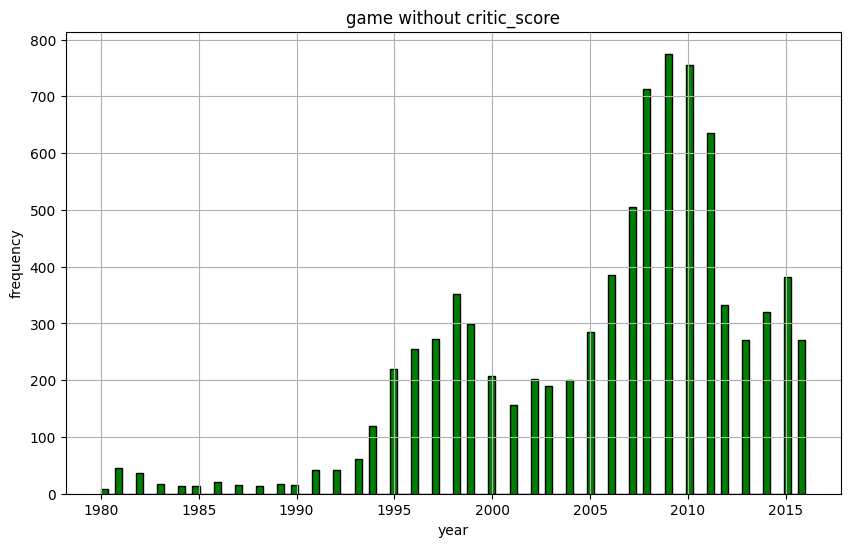

In [10]:
data[data['critic_score'].isna()]['year_of_release'].hist(color='green', edgecolor='black', bins=100, figsize = (10, 6))
plt.title('game without critic_score')
plt.xlabel('year')
plt.ylabel('frequency')
plt.show()

Как видно из графика, без оценки критиков больше всего игр осталось в 2008-2010 гг. Стоит отметить, что пропущенных значений по данному признаку много и в более поздние периоды. Таким образом, наше предположение не подтвердилось. Пропуски - не связаны с ранним выходом игры.    
Из самой таблицы следует, что и платформа игры не влияет на наличие оценки критиков.  
Таким образом, приходим к выводу, что пропуски по данному признаку могут означать отсутствие критики по данной игре в принципе, либо отражать результат технического сбоя (например при выгрузке/загрузке или записи данных). Но в обоих случаях, восстановить данные не предоставляется возможным.  
С целью не исказить реальные результаты исследования - оставим пропуски без изменений.

**rating**

Данный признак на 40% состоит из пропусков. Он характеризует рейтинг от организации ESRB (Entertainment Software Rating Board).   

Согласно внешним источникам, (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) *ESRB - негосударственная организация, основное направление деятельности которой — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения **в США и Канаде**.* Рейтинги ESRB предоставляют информацию о возрастных ограничениях, чтобы родители и потребители могли сделать осознанный выбор в отношении того, какие игры подходят для их семьи.  
Проверим какие уникальные значения принимает столбец `rating`.

In [11]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

В соответствии с тем же внешним источником получаем следующие категории:

**АО** - «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;   
**Е** - «Для всех»: Содержание вполне подходит для всех возрастов;   
**Е10+** - «Для всех от 10 лет и старше»;   
**ЕС** - «Для детей младшего возраста»: Игра подходит для детей от 3 лет;    
**М** - «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет;    
**RP** - «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга;   
**Т** - «Подросткам»: Игра подходит для лиц от 13 лет. 

Вероятно, не все игры из датасета произведены в США и в Канаде.  Поэтому можем предположить, что игры с пропущенным значением в данном рейтинге - являются играми других стран, в которых существуют свои рейтинговые организации.  
Для проверки этого предположения выведем на экран первые 5 строк с пропущенными значениями и, используя внешние ресурсы проверим какая страна является их производителем.

In [12]:
data[data['rating'].isna()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Super Mario Bros., Pokemon Red/Pokemon Blue, Duck Hunt и Nintendogs были разработаны в Японии. Tetris 1989 года тоже произведен в Японии (но интересно, что первоначальная разработка и производство принадлежит советсткому программисту Алексею Пажитнову).

Таким образом, предположение не опровергнуто. Приходим к выводу, что пропуски по данному признаку - допуститмы и их природа может быть объяснима.     
Предлагаем выделить пропуски в отдельную категорию `no_info` и перейти к следующему признаку.

In [13]:
data['rating']=data['rating'].fillna('no_info') # заполняем пропуски 
print ('Количество пропущенных значений:', data['rating'].isna().sum()) # проверим сколько пропущенных значений осталось 

Количество пропущенных значений: 0


**user_score**

Данный столбец также на 40% состоит из пропущенных значений.  
Пользователи могли просто не поставить оценку, поскольку это могло быть не обязательным, и в результате - по некоторым играм могло не набраться необходимое минимальное количество оценок для выведения рейтинга. Также пропуски по данному признаку могут быть и результатом технических проблем. Но в любом случае, заполнять такое большое количество пропусков медианными или средними значениями не является целесообразным для исследования, поскольку велик риск исказить результаты в ложную сторону, так как оценка - является сугубо индивидуальным показателем: что нравится одному пользователю, не обязательно понравится другому. Пропусками оставим без изменений.

Интересно, что тип данных признака `user_score` - object, когда по документации это должно быть число до 10. В связи с этим выведем уникальные значения признака на экран:

In [14]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Стоит отметить, что есть игры с нулевым рейтингом. 
И самое интересное есть текстовый показатель "tbd". Проверим сколько таких значений в датасете:

In [15]:
len(data[data['user_score'] == 'tbd'])

2424

In [16]:
data[data['user_score'] == '0'] # выведем на экран все игры с нулевым рейтингом

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


Почти четверть заполненных данных - это "tbd".   
Согласно внешним ресурсам "tbd" (от англ. "to be determined" - будет определено), что в нашем случае может означать, что оценка по данной игре будет определена позднее, но сейчас её нет.    
Поскольку 2424 игры - это 15% всей совокупности, то потерять так много данных по остальным признакам - не кажется разумным. Игра с нулевым рейтингом в датасете всего одна и теперь мы знаем какая. Поскольку рейтинг пользователя по документации должен носить числовой характер, то заменим все значения "tbd" на 0, будем знать что это за показатель и при его дальнейшем использовании для исследования - это значение будем исключать. Сразу приведем данный признак к вещественному типу:  

In [17]:
data['user_score']=data['user_score'].where((data['user_score'] != 'tbd'), other=0) # производим замену значений "tbd"
data['user_score']=data['user_score'].astype(float) # меняем тип на вещественный

**name, / genre**

В данных признаках пропущено всего по 2 значения, которые существенно на исход исследования повлиять не смогут. Но название игры и ее жанр - это ключевые показатели, по которым можно идентифицировать информацию, поэтому проверим что с этими данными:

In [18]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,no_info
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,no_info


В этих же строках отсутствует информация по жанру, нет информации по рейтингам, даны данные давнего года, поэтому помощи при поиске наиболее перспективного продукта такие строки, вероятно, не принесут - удалим их из исследования методом *dropna()* и обновим индексацию.

In [19]:
data = data.dropna(subset=['name']).reset_index(drop=True)
data.shape # проверим сколько строк осталось

(16713, 11)

**year_of_release**

In [20]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

В датасете содержатся данные за 37 лет, начиная с 1980 года.   
С одной стороны, процент пропусков в данном признаке очень низкий, поэтому можно было бы их проигнорировать, но с другой - выражать год в вещественном типе кажется не совсем корректным.    
Так как основной целью исследования является выявление наиболее перспективного продукта, то его изучение в данном случае будет непосредственно связано с датой выхода игры, поскольку данные хранят в себе историю за несколько десятков лет (а вкусы и предпочтения изменяются во времени, плюс предлагаемый ассортимент имеет свойство устаревать и к тому же компьютерные технологии постоянно совершенствуются стремительными темпами). Поэтому строки с пропущенным годом выхода игры можем счесть не столь информативными для исследования и убрать:

In [21]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data.shape # проверим сколько строк осталось

(16444, 11)

#### Изменение типов данных

Еще раз выведем типы данных на экран:

In [22]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Признак `user_score` приведен к вещественному типу на прошлолом этапе.  
Остались проблемы в признаке `year_of_release`. В данном исследовании год выхода лучше привести к целочисленному типу:

In [23]:
data['year_of_release']=data['year_of_release'].astype(int)

#### Проверка на дубликаты и аномалии

In [24]:
data.duplicated().sum()

0

In [25]:
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,9839.000000
mean,0.264012,0.145930,0.078487,0.047594,68.994363,5.405407
std,0.818378,0.506716,0.311100,0.188005,13.920060,3.317917
min,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,60.000000,2.400000
50%,0.080000,0.020000,0.000000,0.010000,71.000000,6.900000
75%,0.240000,0.110000,0.040000,0.030000,79.000000,8.000000
max,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


В результате проверки, строки-дубликаты не выявлены.    
Среди числовых показателей явно "выбивающихся" значений нет.

#### Расчет необходимых параметров

Рассчитаем суммарные продажи во всех регионах и запишем результат в столбец `total_sales`, выведем случайные 3 строки для проверки:

In [26]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2396,Army Men: Air Attack,PS,1999,Action,0.47,0.32,0.00,0.06,NaN,NaN,no_info,0.85
11362,The Bachelor: The Videogame,DS,2010,Misc,0.07,0.00,0.00,0.01,NaN,0.0,T,0.08
2031,Monster Rancher,PS,1997,Simulation,0.12,0.08,0.74,0.07,86.0,8.3,no_info,1.01


**Выводы**  
Данные предобработаны, пропуски заменены, где это требовалось, столбцы приведены к нужному типу, исправлен стиль заголовков, рассчитаны необходимые параметры. В таблице для исследования осталось 16444 объекта.   
Также стоит обратить внимание, что при использованиии показателя `user_score` в исследовании, необходимо учитывать значения, не равные 0.

### Исследовательский анализ данных

#### Изменение числа игр по годам

С целью отследить сколько игр выпускалась в каждый год построим столбчатый график. Для этого выведем на экран  вспомогательную сводную таблицу с помощью *pivot_table()* и визуализируем ее: 

In [27]:
df = data.pivot_table(index=['year_of_release'], values='name', aggfunc = 'count')
df.columns = ['games_quantity'] # переименуем колонки
df.T

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
games_quantity,9,46,36,17,14,14,21,16,15,17,16,41,43,60,121,219,263,289,379,338,350,482,829,775,762,939,1006,1197,1427,1426,1255,1136,653,544,581,606,502


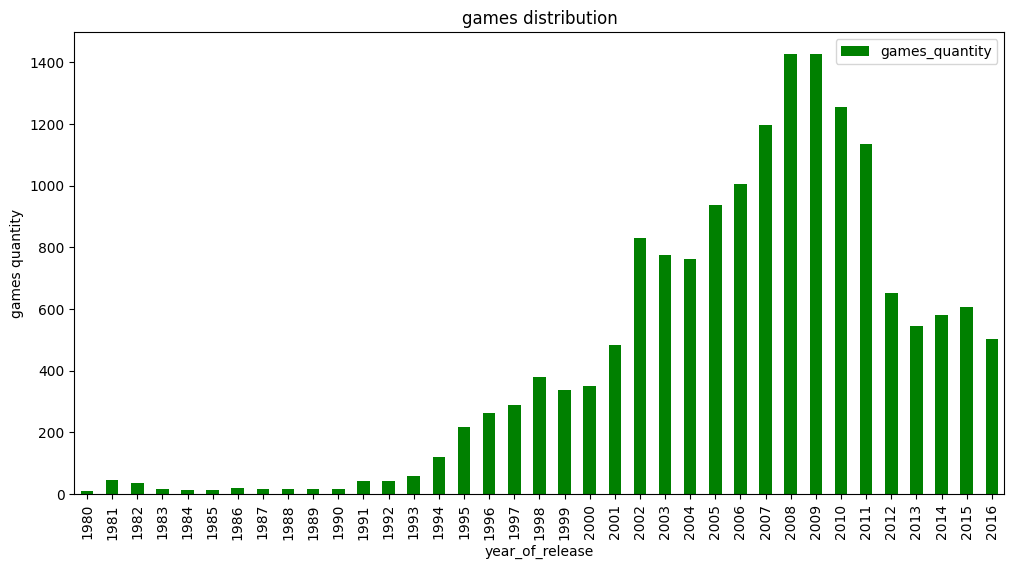

In [28]:
df.plot(kind='bar', figsize=(12,6), color='g')
plt.title('games distribution')
plt.xlabel('year_of_release')
plt.ylabel('games quantity')
plt.show()

Видим, что в течение 15 лет (до 1995 года) выпускалось менее 200 компьютерных игр в год (отметим, что до 1993 года этот показатель не превышал и 50), что кажется логичным по тому периоду времени. Начиная с 1995 года, число выпускаемых игр превысило 200 штук и, в целом, показатель практически ежегодно увеличивался вплоть до 2009 года. Вероятно, это может быть связано с "компьютеризацией" общества и как следствие увеличением спроса на продукт.         
Пиком выпуска компьютерных игр стали 2008-2009 гг - в год тогда выпускалось чуть более 1400 игр (что в 6,5 раз больше, чем в 1995г.). Начиная с 2010 года производство игр начало сокращаться и к 2012 г упало по сравнению с пиковым 2009-м более, чем в 2 раза, с тех пор оставалось примерно на одном уровне. Возможно, данный скачок был связан со снижением спроса именно на компьютерные игры вследствие "переориентации" общества в сторону мобильных устройств.      

Данные за все периоды, безусловно, важны и интересны, но только для того, чтобы посмотреть историю развития процесса.   
Ведь всё, что связано с компьютерными технологиями - развивается и совершенствуется стремительными темпами, быстро устаревает, поэтому 37 лет для выбора наиболее перспективного продукта в данной области - очень много, и все данные для такого анализа использовать не стоит. При посторении прогнозов и оценок в данной области лучше ориентироваться на более актуальные и современные данные. 

#### Изучение объемов продаж по платформам

В игровой индустрии термин *игровая платформа - означает электронное вычислительное устройство, способное воспроизводить видео игры.* В истории развития игр известны многие платформы.   
Проверим какое количество платформ встречается в нашем датасете и выберем платформы с наибольшим количеством выпущенных игр за все 37 лет:

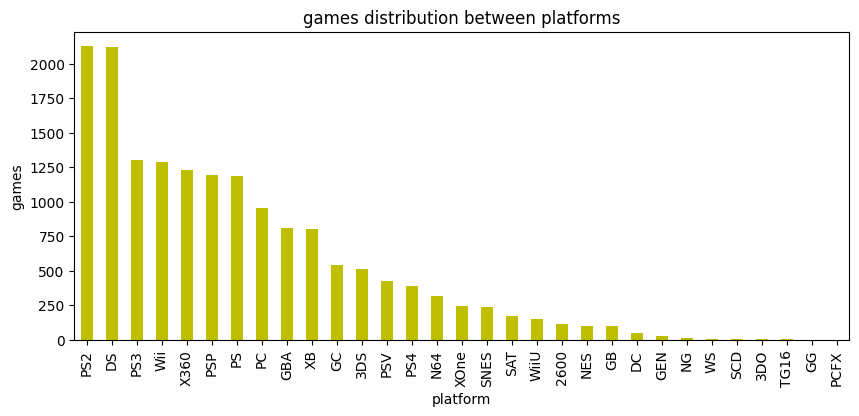

Всего платформ: 31


In [29]:
data['platform'].value_counts().plot(
    kind='bar', title ='games distribution between platforms', color='y', figsize=(10,4)
)
plt.xlabel('platform')
plt.ylabel('games')
plt.show()
print('Всего платформ:', data['platform'].nunique())

Всего в датасете представлена 31 платформа. За весь период больше всего игр выпущено на платформах "PS2" и "DS", их количество превысило 2000 шт.   

Посмотрим, как менялись продажи по платформам. Для этого определим 7 платформ с наибольшими суммарными продажами c помощью метода *groupby()*:

In [30]:
data.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False).head(7)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
Name: total_sales, dtype: float64

Интересно, что игры на платформе "DS", не смотря на большое количество выпущенных игр, не смогли обеспечить самый большой объем продаж.   

Среди выявленных лидеров рынка построим распредение общего объема продаж в разрезе лет:

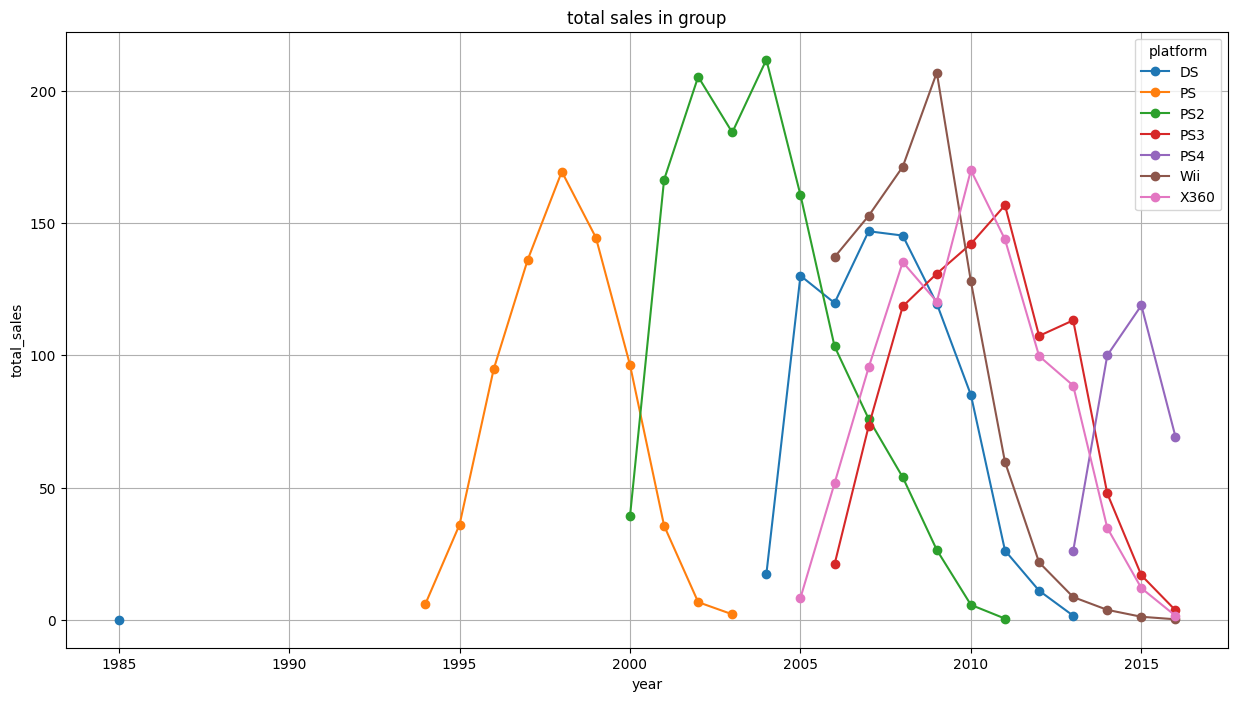

In [31]:
platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4'] # введем вспомогательную переменную c названиями платформ
(
    data.query ('platform == @platform_list')
    .pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum')
    .plot(title='total sales in group', style='o-', grid=True, figsize = (15,8))
) 
plt.xlabel('year')
plt.ylabel('total_sales')
plt.show()

 Из графика следует, что у каждой платформы есть свой пик продаж, а в конечном итоге общий объем ее продаж приходит к нулю. Это может означать, **что жизнь платформы - не вечна, со временем она устаревает**. На графике четко можно проследить "цикл" ее жизни длиной в несколько лет.    

Что касается общего объема продаж, то самой успешной за все времена стала платформа "PS2", пик ее продаж приходится на 2001-2005 гг.     
Среди лидеров рынка максимального объема продаж за год достигли игры на той же платформе "PS2" в 2004 году (за год было продано более 200 млн. копий). К ним приблизились лишь однажды (в 2009 году) игры на платформе "Wii", но что интересно, начиная с 2010 года "Wii" ожидало резкое сокращение объемов продаж.   
Стоит отметить, что до 2005 года среди платформ не было явной "конкуренции", а в период с 2004 по 2006 в борьбу за лидерство вступили сразу 4 платформы, которые изжили себя полностью к 2016 году.   
Самой "молодой" и современной платформой среди лидеров является платформа "PS4", в 2015 году объем ее продаж составил около 120 млн. копий.   
Также на графике прослеживается к 2015 году снижение объемов продаж, в целом.


Еще, что "бросается в глаза" - это наличие продаж игр на платформе "DS" в 1985 году, что похоже на выброс, так как датой создания данной платформы в сети интернет считается 2004 год. Проверим какие строки попадут в это значение:

In [32]:
data.query('year_of_release == 1985 and platform == "DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,no_info,0.02


 Это всего лишь одна игра с небольшим объемом продаж в Японии. Утверждать наверняка, что платформы с таким названием в истории становления игр в 1985 году не было - мы не можем, но поскольку игра относится к давнему периоду и никакой полезной информации эти данные для исследования не принесут, а лишь исказят данные о средней жизни платформы, то лучше уберем их из дальнейшего исследования: 

In [33]:
data = data[data['name'] != 'Strongest Tokyo University Shogi DS']
data.shape

(16443, 12)

Теперь рассмотрим на графике сколько лет "живет" каждая платформа и посчитаем среднее время ее жизни:

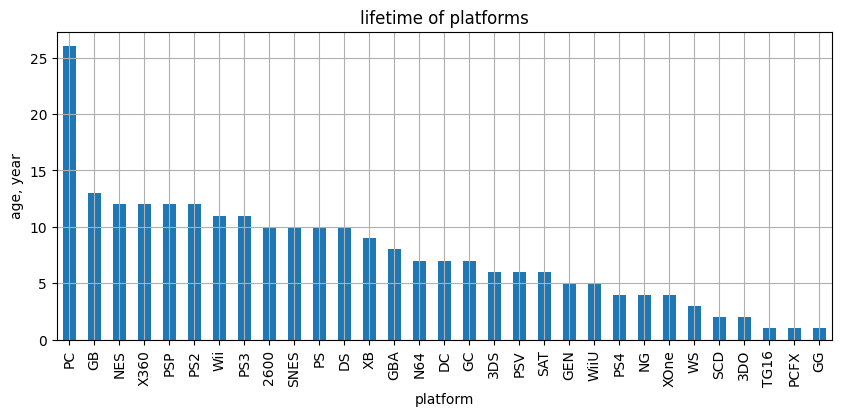

Описание признака:


count    31.000000
mean      7.645161
std       5.063256
min       1.000000
25%       4.000000
50%       7.000000
75%      10.500000
max      26.000000
Name: year_of_release, dtype: float64

In [34]:
df = data.groupby(by='platform')['year_of_release'].nunique().sort_values(ascending=False)
df.plot(kind='bar', title='lifetime of platforms', grid=True, figsize=(10,4))
plt.ylabel('age, year')
plt.show()
print('Описание признака:')
df.describe()

Платформы развиваются и склонны к совершенствованию, устаревшие виды сменяются новыми. **В среднем, продолжительность "жизни" платформы составляет 7 лет** (и у половины платформ в датасете продолжительность существования не превышает этот уровень).
Но также стоит отметить, что встречаются и редкие экземпляры, которые действовали на протяжении более 25 лет, такие как платформа "PC", но это, скорее - исключение.   
Интересно, как изменялась такая продолжительность во времени. Визуализируем время существования каждой платформы с помощью диаграммы рассеяния, в которой продуктивный период существования будет отмечен более яркими точками:

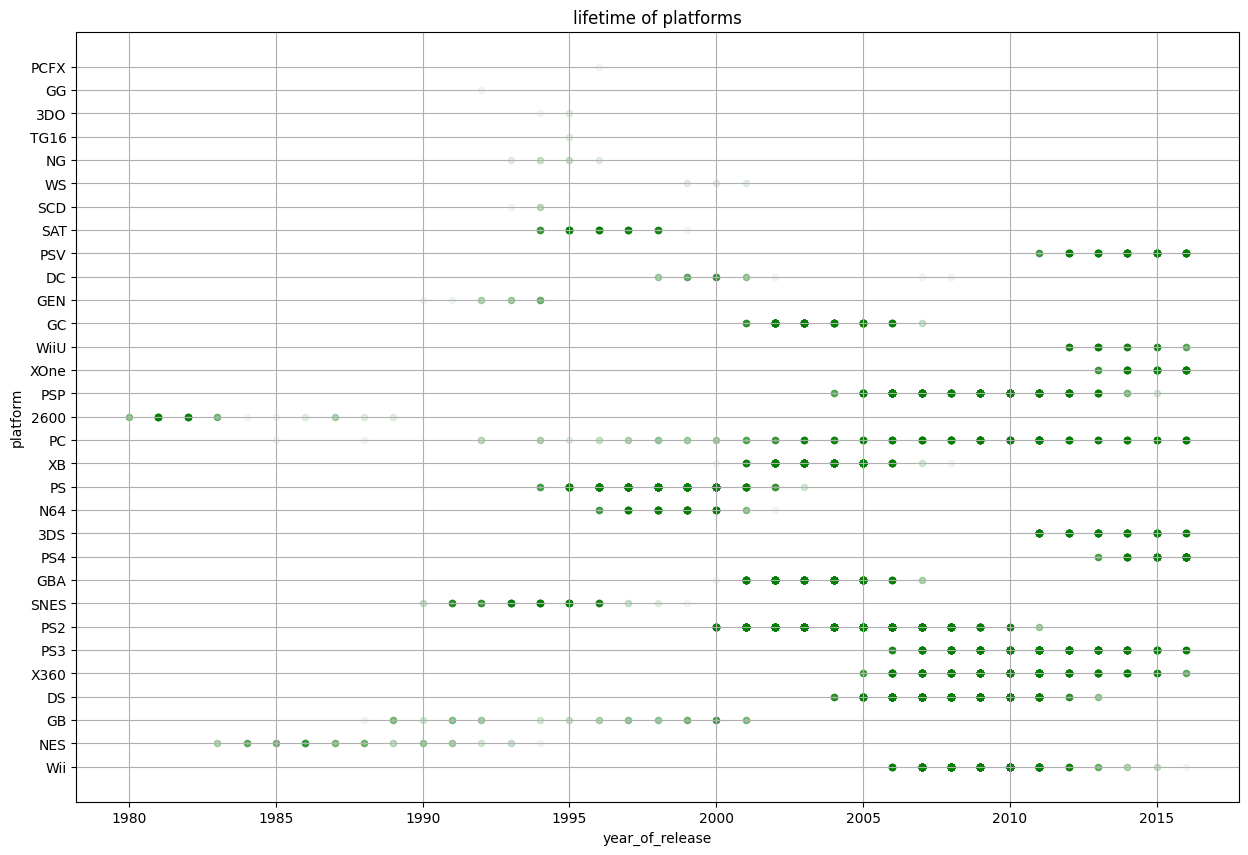

In [35]:
data.plot(x='year_of_release', y='platform', kind='scatter',color='g', alpha=0.05, figsize=(15,10), grid=True)
plt.title('lifetime of platforms')
plt.show()

На диаграмме видно какие платформы уже точно давно стали неактуальными, а какие более современные и наращивают темп. Интересно, что рекордсмен по продолжительности жизни "РС" - достойно проявляет себя и в условиях современных периодов, платформа достаточно распрастранена.  

С целью выявить наиболее перспективный продукт исследовать будем данные только за актуальный период. Чтобы отследить основные линии трендов возьмем данные за последние несколько лет. Самые современные платформы появились в 2013 году, поэтому будем использовать данные за последние 4 года, начиная с 2013 года. Сделаем срез и сохраним его  в переменной `data_good`.

In [36]:
data_good = data[data['year_of_release'] >= 2013]
data_good.shape

(2233, 12)

Таким образом, в дальнейшем исследовании будем использовать данные по 2233 объектам. Найдем какие платформы лидируют по продажам.

In [37]:
(data_good
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


По объему продаж за весь период лидируют платформы "PS4" и "PS3" и "XOne", но в данном случае важно рассмотреть тренды объема продаж по платформам в разрезе лет:

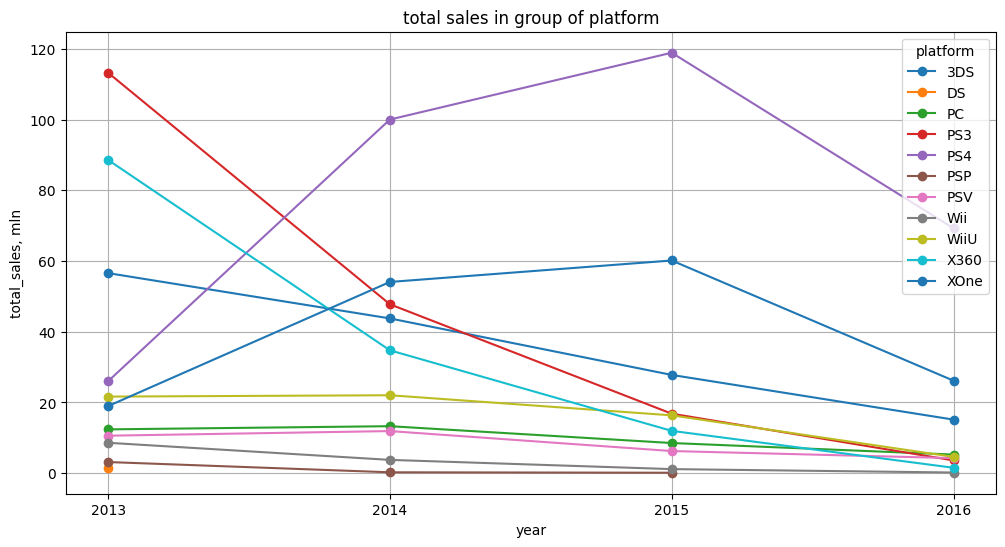

In [38]:
(
    data_good.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum')
    .plot(title='total sales in group of platform', style='o-', grid=True, figsize = (12,6))
) 
plt.xlabel('year')
plt.ylabel('total_sales, mln')
plt.xticks(ticks=[2013, 2014, 2015, 2016])
plt.show()

Глядя на график, сразу можно назвать три наиболее перспективных платформы на 2017 год - это самые современные платформы.   
**C 2014 года самой популярной и перспективной можно считать платформу "РS4", вторая по популярности - "XOne", на третьем месте - "3DS".**     
Стоит отметить, что в целом, **намечена общая тенденция к снижению объемов продаж у каждой платформы**, даже у потенциально прибыльных платформ наметилось снижение по сравнению с 2015 годом, что заставляет задуматься об их будущей прибыльности.

#### Диаграмма размаха по глобальным продажам игр

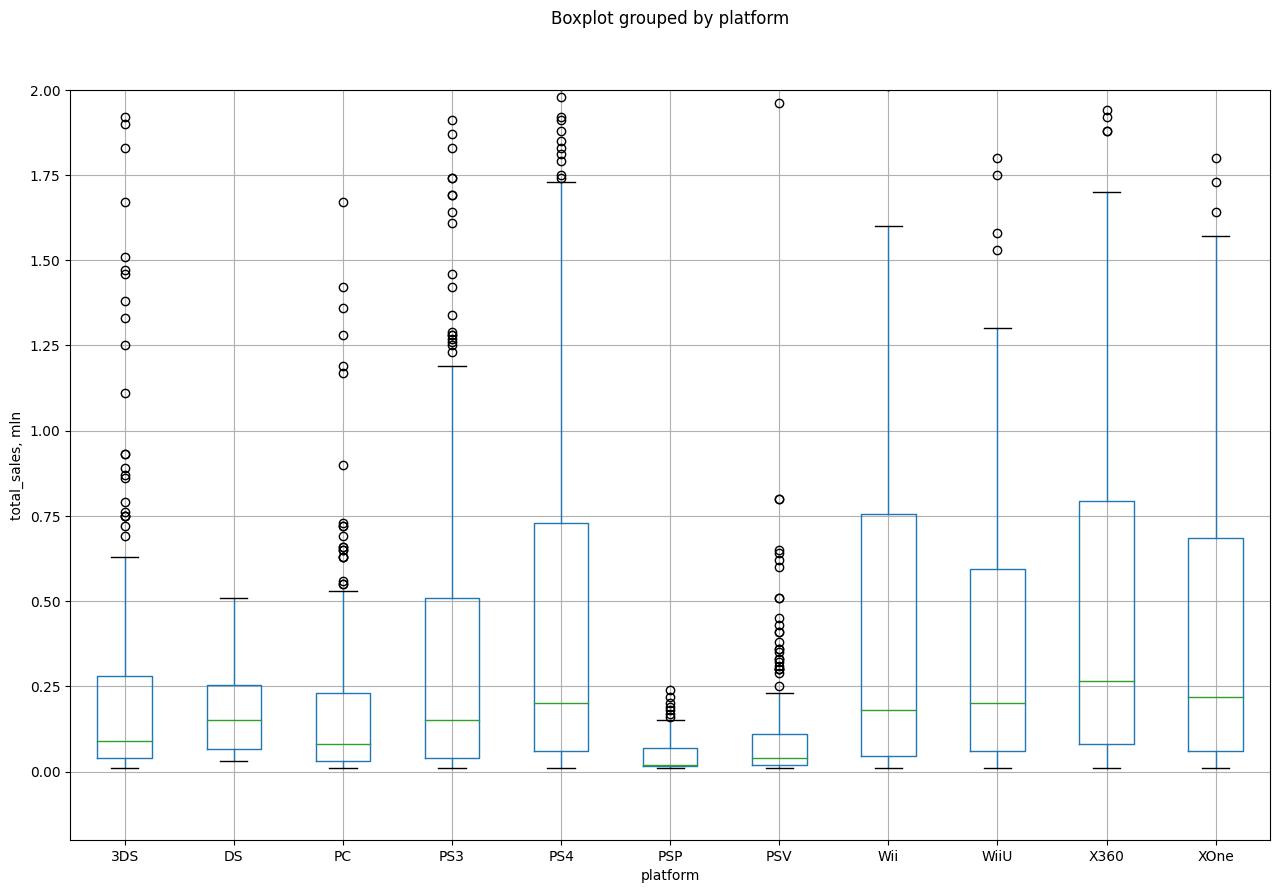

Медианное значение каждой группы:


platform
X360    0.265
XOne    0.220
PS4     0.200
WiiU    0.200
Wii     0.180
DS      0.150
PS3     0.150
3DS     0.090
PC      0.080
PSV     0.040
PSP     0.020
Name: total_sales, dtype: float64

In [39]:
# строим диаграмму
fig, ax = plt.subplots(figsize=(15,10))
data_good.boxplot(column='total_sales', by='platform', ax=ax)
ax.set_title('')
ax.set_ylabel('total_sales, mln')
ax.set_ylim(-0.2, 2)
plt.show()

# выведем медианное значение продаж по каждой группе
print("Медианное значение каждой группы:")
data_good.groupby(by='platform')['total_sales'].median().sort_values(ascending=False)

Диаграмма говорит, что на каждой платформе медианы объема продаж каждой игры находятся на разном , но невысоком уровне, не превышающем 300 тыс. копий за игру при высоких максимальных значениях показателя, поэтому видно много "выбросов", находящихся за пределами допустимого размаха. При этом, у платформ "PS4", "X360" и "XOne" допустимыми считаются показатели 1,5-1,75 млн. копий, превышающие это значение показатели - можно считать нехарактерными для данной совокупности. У 75% игр платформ "PS4" и "XOne" продажи не превышают 750 млн. копий. Что касается еще одной потенциально перспективной платформы "3DS", то здесь показатели ниже, чем у "PS4" и "XOne" - у 75% игр продажи не превышают 300 тыс. копий.

У платформ "DS" и "PSP", показатели практически вообще не выходят за пределы допустимого размаха, а у платформы "PSP" медиана стремится к нулю,  поэтому для выявления перспективного продукта такие платформы не представляют интереса.   
Но среди платформ, в целом, есть немало игр, проданных в количестве более 5 миллионов копий. В связи с этим интересно составить рейтинг ТОП-10 самых продаваемых игр 2013-2016 года выхода:

In [40]:
# сначала исключим неактуальные для исследования платформы:
data_good = data_good[(data_good['platform'] != 'DS') & (data_good['platform'] != 'PSP')]
# выводим рейтинг ТОП-10 игр по продажам
data_good.sort_values(by='total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_info,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_info,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_info,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,no_info,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Интересно, что лидером по продажам стала игра 2013 года "Grand Theft Auto V", выпущенная как на платформе "PS3", так и на платформе "X360", что, вероятно, может говороить о высоком качестве самого продукта. Еще одной такой игрой в ТОП-10 является "Call of Duty: Ghosts", выпущенная на платформах  "X360" и "PS3".	  
Также в ТОП-10 видны 3 игры на платформе-лидере "PS4".
 

#### Изучение влияния отзывов на продажи

Было бы логичным предположить, что объем продаж находится в линейной зависимости с рейтингом игры: то есть чем выше рейтинг игры, тем больше объем её продаж.  
Рассчитаем коэффициенты корреляции Пирсона между отзывами и продажами, построим диаграмму рассеяния на примере одной платформы.

Поскольку платформа "PS4" является актуальной, наиболее перспективной и имеет наибольший объем продаж , исследовать тесноту линейной взаимосвязи будем на ней.   

Для построения диаграмм рассеяния и вывода коэффициента корреляции создадим функцию `scatter_func` и применим её. Но важно учесть один момент: нужно исключить нулевые значения в оценке пользователя, которыми мы заменили игры, для которых рейтинг еще не определен:

In [41]:
def scatter_func (col1, col2, name_platform): # строим диаграмму
    df = data_good[data_good['platform'] == name_platform]
    df.plot(x=col1, y=col2, kind='scatter', alpha=0.2, figsize=(8,4))
    plt.title('scatterplot '+str(col1)+' and '+ str(col2) + ' for ' + str(name_platform) + '_platform')
    plt.xlabel(str(col1))
    plt.ylabel(str(col2)+', mln')
    plt.show()
    
    # считаем корреляцию
    df_user = df[df['user_score'] != 0]
    if col1 == 'user_score' or col2 == 'user_score':
        return print('Коэффициент корреляции Пирсона равен:', df_user['user_score'].corr(df_user['total_sales']))
    else:
        return print('Коэффициент корреляции Пирсона равен:', df['critic_score'].corr(df['total_sales']))

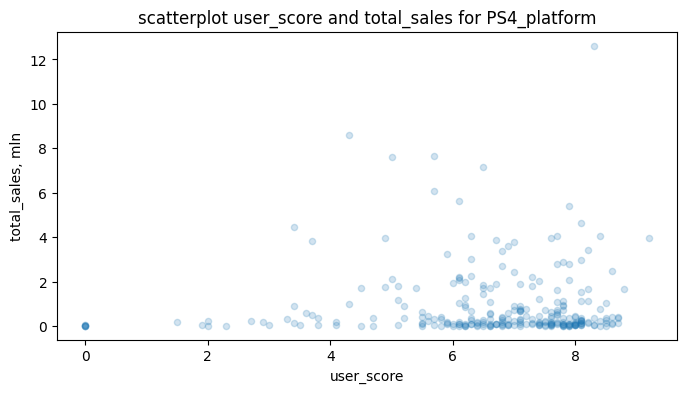

Коэффициент корреляции Пирсона равен: -0.031957110204556466


In [42]:
scatter_func('user_score', 'total_sales', 'PS4')

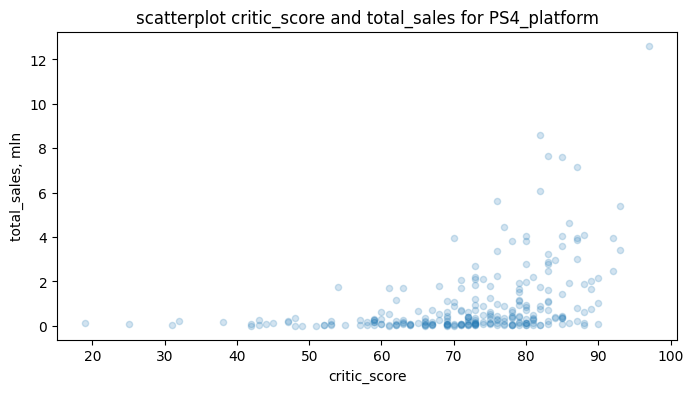

Коэффициент корреляции Пирсона равен: 0.4065679020617813


In [43]:
scatter_func('critic_score', 'total_sales', 'PS4')

Изучив показатели платформы "PS4", **можно заметить слабую положительную линейную связь общего объема продаж с оценкой критиков, в то время как оценка пользователя линейно с ним практически не связана.**   
Интересно изучить такую взаимосвязь по остальным платформам. Для этого построим матрицы корреляции для всех остальных платформ с помощью функции `correlation_func`:

In [44]:
def correlation_func(name_platform):
    # отбираем необходимый срез данных
    df = data_good[data_good['platform'] == name_platform]
    df = df[df['user_score'] != 0]
    cols = ['user_score', 'critic_score', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']
    
    # строим тепловую карту на основе матрицы корреляции по платформе
    corr_matrix = df[cols].corr()
    # если значение меньше 0,2 по модулю, то приравняем его к нулю для быстрого восприятия
    corr_matrix[np.abs(corr_matrix)<0.2] = 0 
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation matrix for  ' + str(name_platform) + ' platform')
    plt.show()  

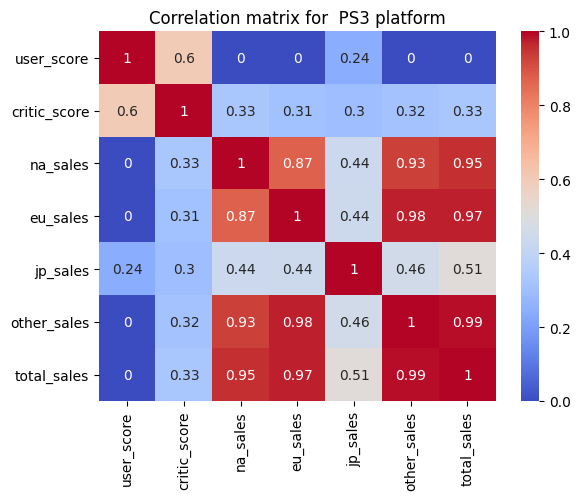

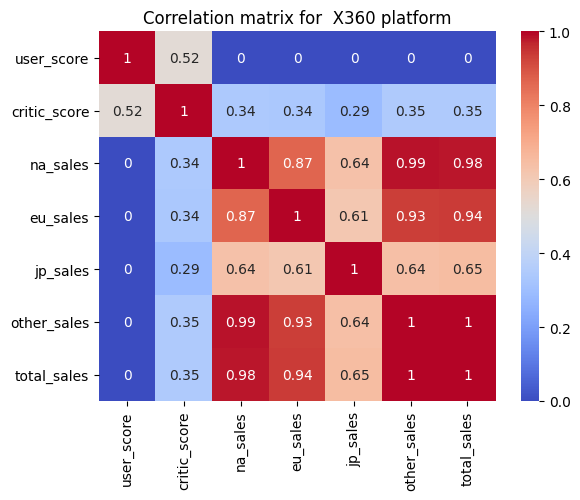

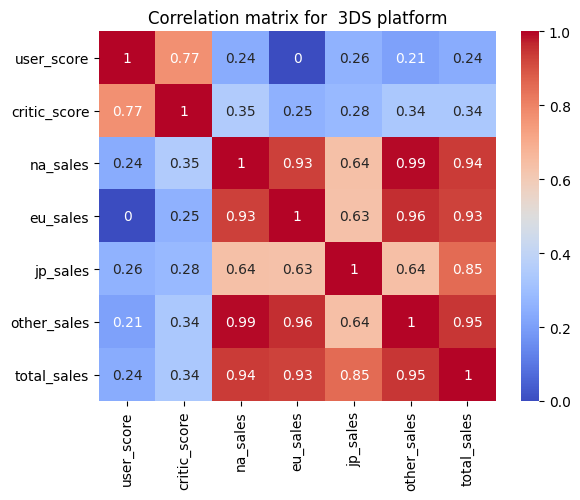

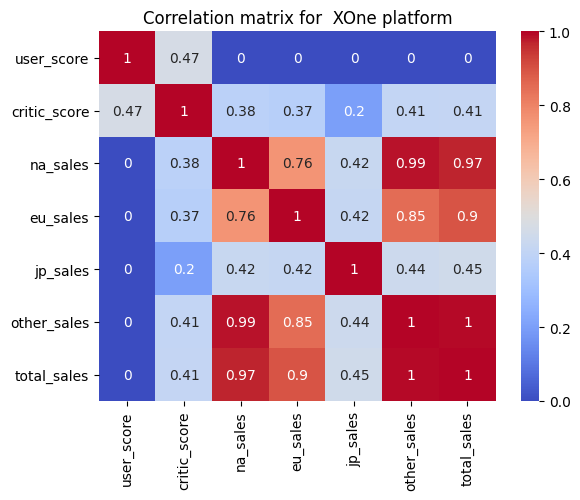

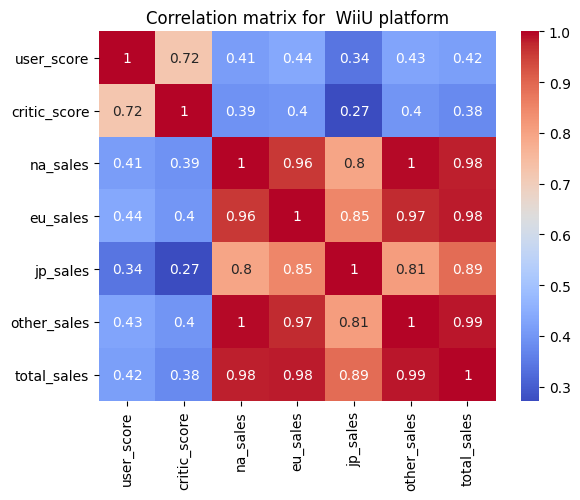

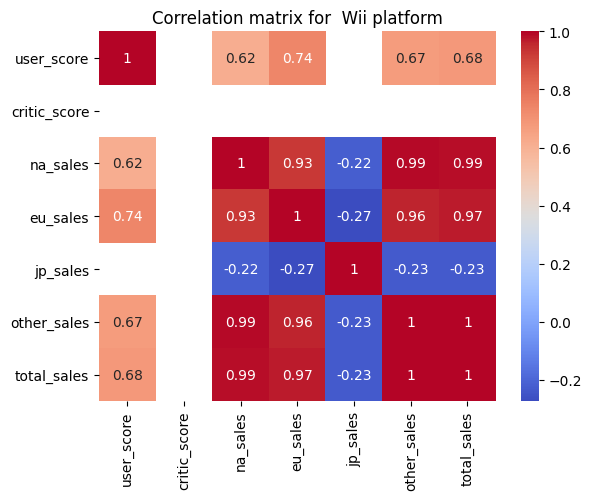

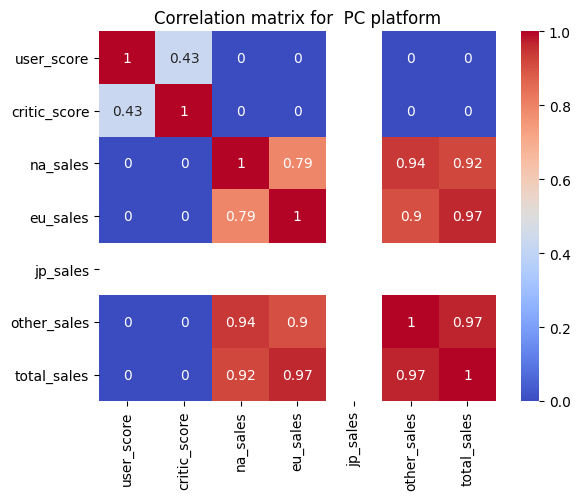

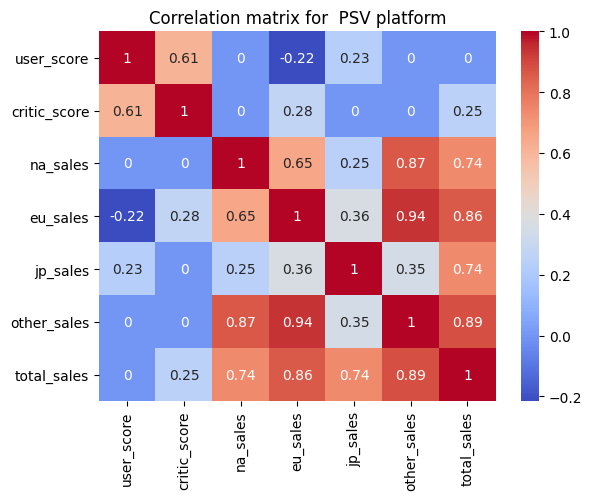

In [45]:
# создадим список с названием платфором, для которых будем строить матрицы
platforms_list =['PS3', 'X360', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV']
# применим к элементам списка функцию correlation_func
for value in platforms_list:
    correlation_func(value)
    plt.show()

Построим диаграммы рассеяния по остальным платформам для оценки критиков и объема продаж:

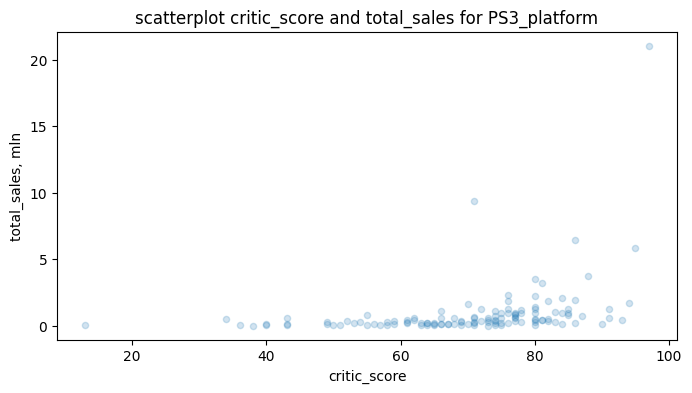

Коэффициент корреляции Пирсона равен: 0.33428533933719196


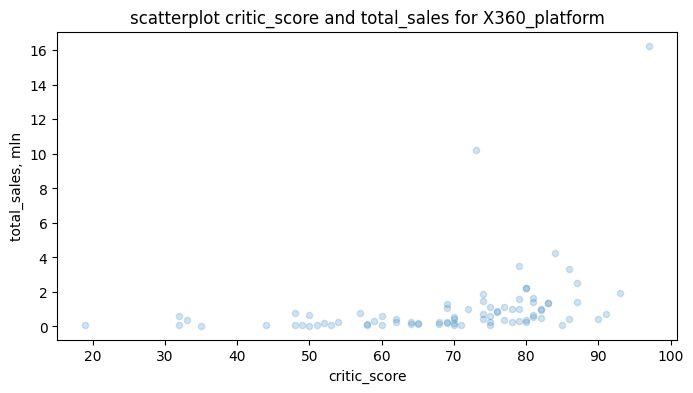

Коэффициент корреляции Пирсона равен: 0.3503445460228666


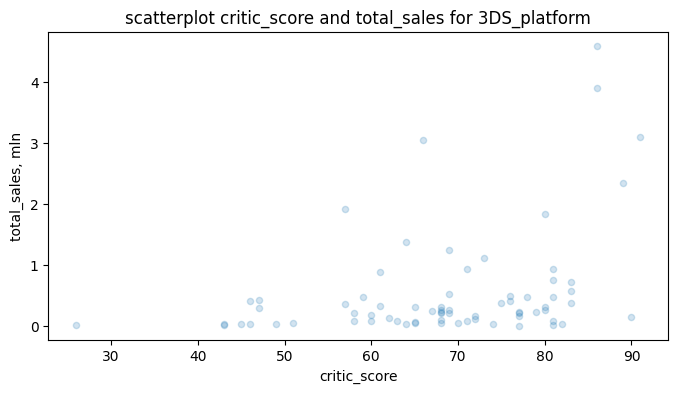

Коэффициент корреляции Пирсона равен: 0.35705661422881046


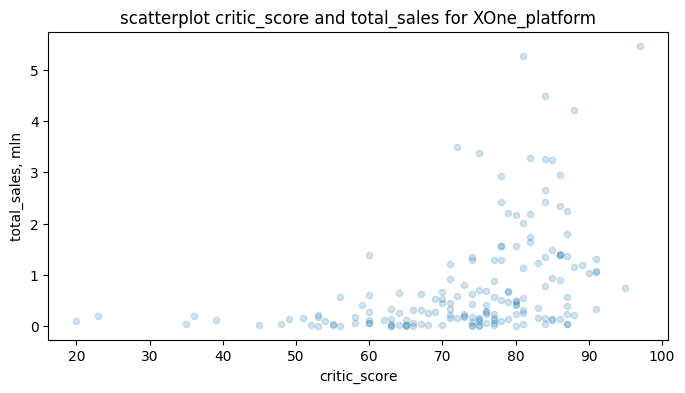

Коэффициент корреляции Пирсона равен: 0.41699832800840153


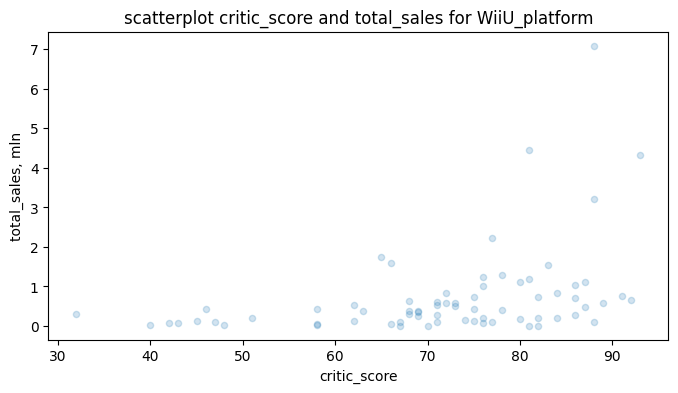

Коэффициент корреляции Пирсона равен: 0.3764149065423912


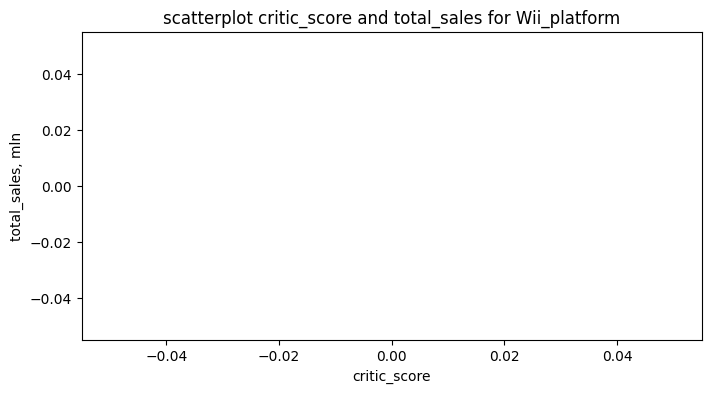

Коэффициент корреляции Пирсона равен: nan


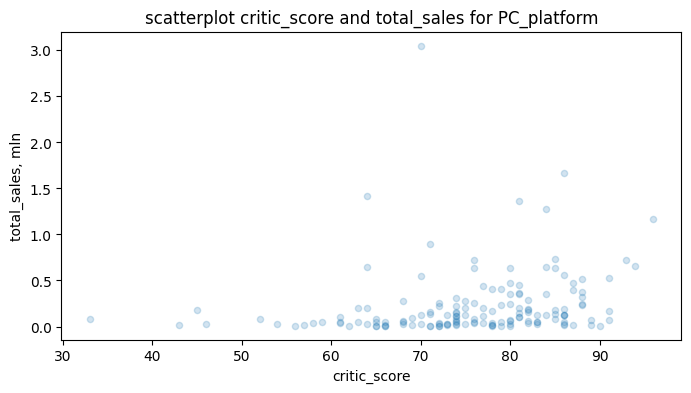

Коэффициент корреляции Пирсона равен: 0.19603028294369362


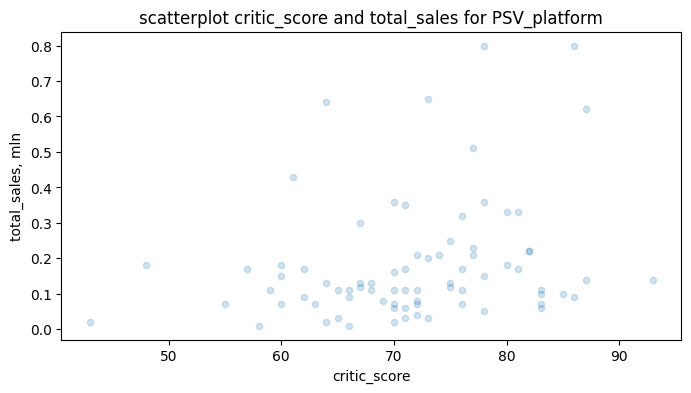

Коэффициент корреляции Пирсона равен: 0.25474235030686554


In [46]:
for value in platforms_list:
    scatter_func('critic_score', 'total_sales', value)
    plt.show()

Построим диаграммы рассеяния по остальным платформам для оценки пользователя и объема продаж:

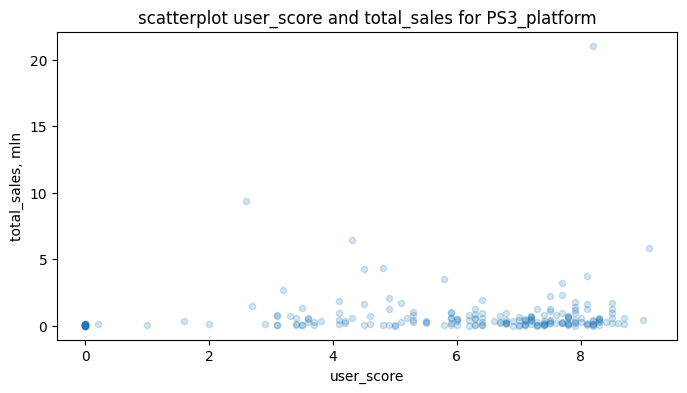

Коэффициент корреляции Пирсона равен: 0.0023944027357566755


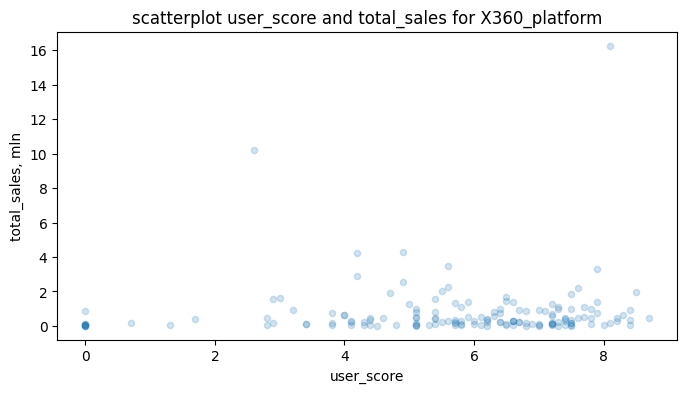

Коэффициент корреляции Пирсона равен: -0.011742185147181387


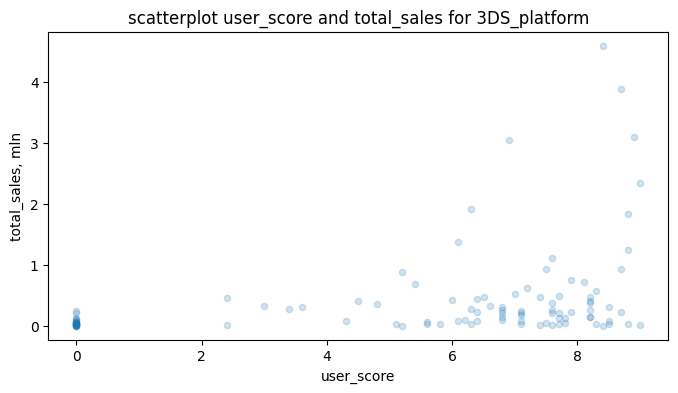

Коэффициент корреляции Пирсона равен: 0.2415041177356302


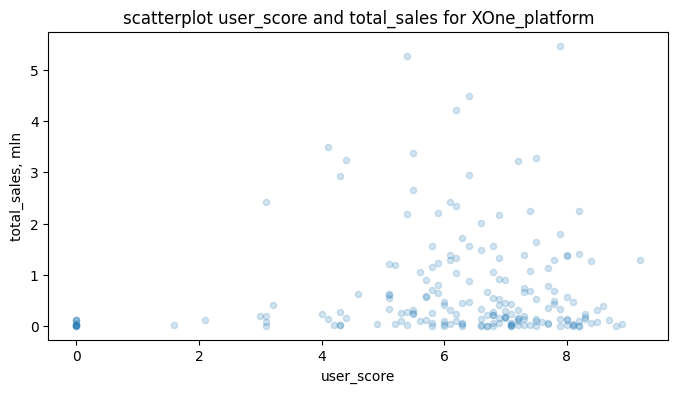

Коэффициент корреляции Пирсона равен: -0.0689250532827942


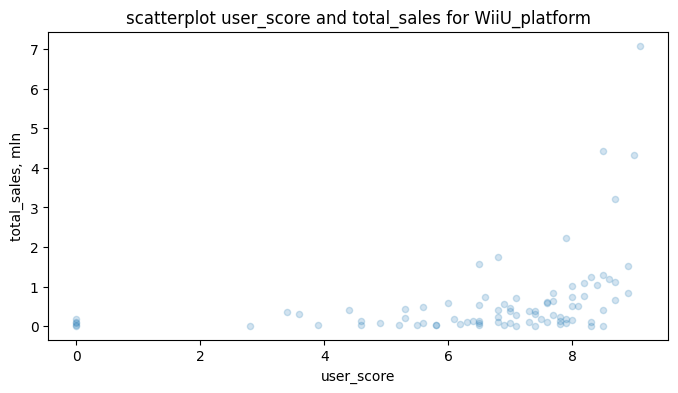

Коэффициент корреляции Пирсона равен: 0.4193304819266184


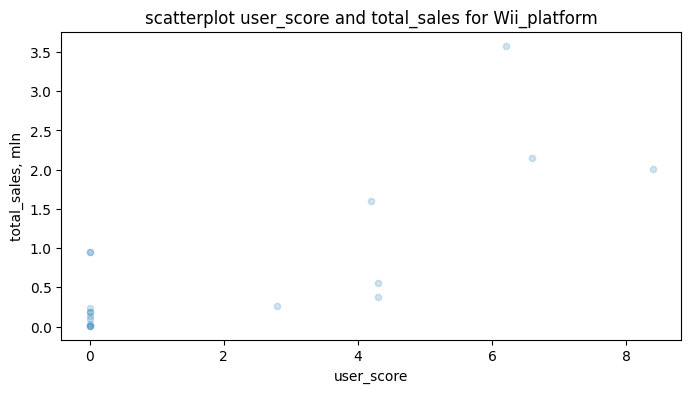

Коэффициент корреляции Пирсона равен: 0.6829417215362368


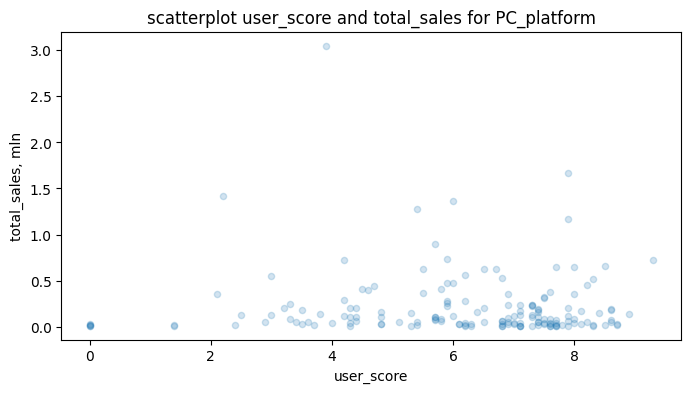

Коэффициент корреляции Пирсона равен: -0.09384186952476749


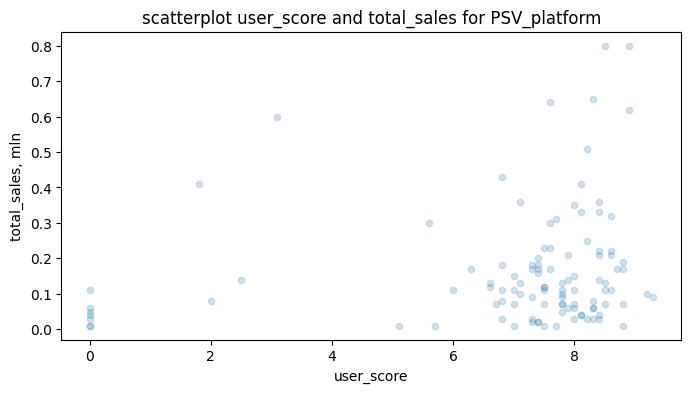

Коэффициент корреляции Пирсона равен: 0.000942472331910853


In [47]:
for value in platforms_list:
    scatter_func('user_score', 'total_sales', value)
    plt.show()

Рассмотрев матрицы корреляции по всем платформам и диаграммы рассеяния, приходим к выводу, что **общий объем продаж по платформам линейно не зависим от оценок, которые выставляют пользователи.** Здесь интересно отметить момент, что по коэффициентам корреляции по платформе "Wii" существует хорошая средняя линейная зависимость, то есть чем выше оценка пользователя, тем больше объем продаж игр на этой платформе. Но это является, скорее, случайностью, чем закономерностью, поскольку по остальным платфоромам такая связь не прослеживается (На диаграмме рассеяния видны лишь несколько случайных точек по данной платформе).  
**Что касается рейтингов критиков, то здесь линейная зависимость прослеживается лучше, но теснота связи не превышает и 0,45 по каждой из платформ.**   

#### Распределение игр по жанрам

Рассмотрим структуру совокупности по представленным жанрам:

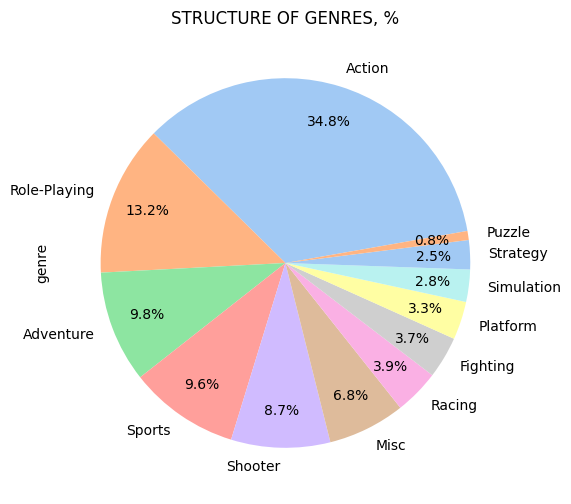

In [48]:
colors = sns.color_palette('pastel')
data_good['genre'].value_counts().plot(
    kind='pie', figsize=(6,6), colors=colors, autopct='%1.1f%%', pctdistance=0.8, startangle=10
)
plt.title('STRUCTURE OF GENRES, %')
plt.show()

Больше всего в датасете представлено игр в жанре "Action" (почти 35% всех игр), также популярными жанрами стали 'Role-Playing',  "Adventure" и "Sports".  Наименьшее распространение среди игр 2013-2016 гг получили игры в жанрах  'Puzzle', 'Strategy' и 'Simulation'.   

Проверим как жанр игры влияет на уровень ее продаж. Сгруппируем данные по жанрам и в разрезе групп выведем суммарный объем продаж:

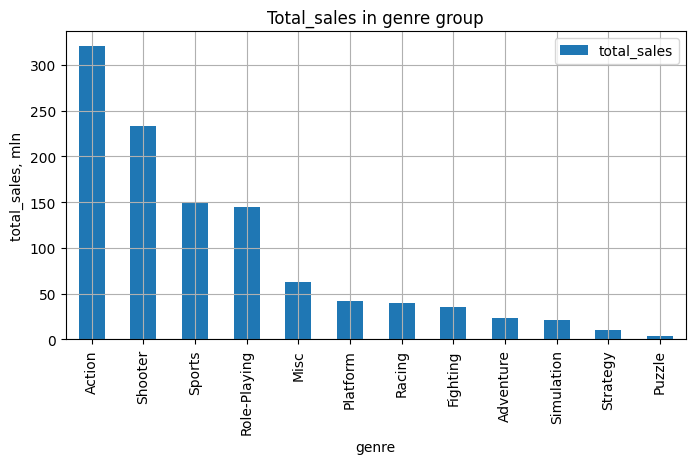

In [49]:
(
    data_good.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending = False)
    .plot(kind='bar', title='Total_sales in genre group', figsize=(8,4), grid=True)
)
plt.ylabel('total_sales, mln')
plt.show()

Самыми прибыльными, вероятно, являются жанры с наивысшим числом продаж. **Наибольшего объема продаж среди жанров заметно достигли игры "Action", "Shooter" и "Sports". Меньше всего игр продано в жанрах "Puzzle" и "Strategy"**. Представим на графике как изменялись такие продажи во времени:

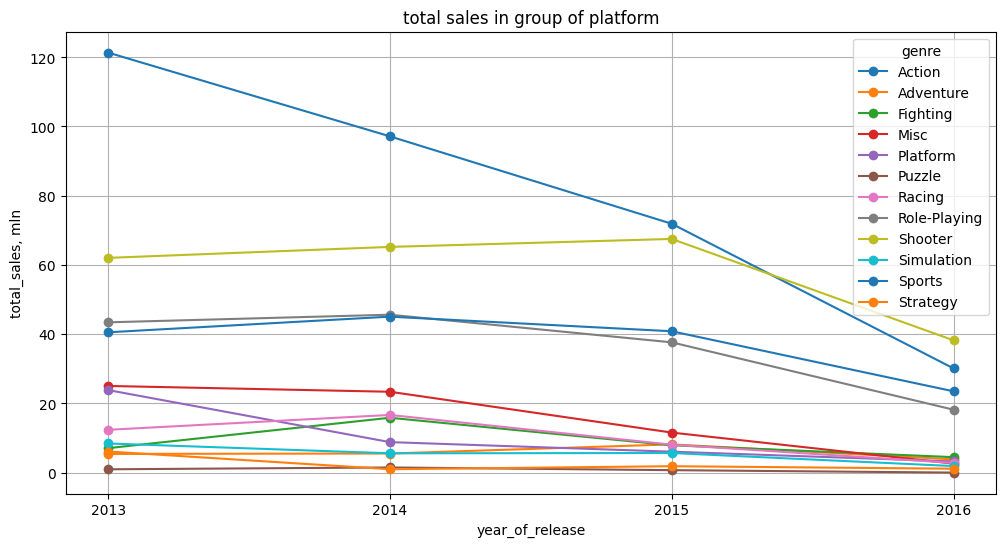

In [50]:
(
    data_good.pivot_table(index='year_of_release', values='total_sales', columns='genre', aggfunc='sum')
    .plot(title='total sales in group of platform', style='o-', grid=True, figsize = (12,6))
)
plt.ylabel('total_sales, mln')
plt.xticks(ticks=[2013, 2014, 2015, 2016])
plt.show()

Во всех жанрах к 2016 году наметилась тенденция к снижению объемов продаж, что, обусловлено общей тенденцией к снижению продаж. **В 2017 году наиболее перспективным может стать жанр "Shooter".** Также стоит обратить внимание на "Sports" и "Role-Plaing".   
Что касается наиболее продаваемого жанра "Action", то его продажи из года в год стремительно падают (быстрее, чем у выделенных трех жанров), поэтому делать ставки на него в 2017 году - не считаем целесообразным.

**Выводы:**   

 Компьютерные технологии развиваются стремительными темпами, а как следствие и продукты игровой индустрии быстро изменяются. Пик выпущенных игр приходится на 2008-2009 гг, когда выпускалась более 1400 игр в год.   
 
 За способность воспроизводить видео игры отвечают игровые платформы. Ввиду высокой динамичности развития, платформы имеют способность устаревать и прекращать свое существование. Средняя продолжительность "жизни" платформы по исходному датасету составляет 7 лет, поэтому большая часть платформ была признана устаревшими и бесполезными для исследования.   
 Наиболее перспективными для 2017 года можно считать платформы: "PS4", "XOne" и "3DS".   
 Но стоит отметить, что замечена общая тенденция к снижению объемов продаж вне зависимости от вида платформы.
 
 Самой продаваемой игрой 2013-2016 гг стала игра "Grand Theft Auto V" 2013 года на платформе "PS3", ее продажи превысили 20 млн. копий. 
 
 Наиболее распространенным жанром среди игр 2013-2016 можно считать жанр "Action", продажи которого в последнее время стремительно начали падать. В связи с этим наиболее перспектитвными в 2017 г. могут стать жанры: "Shooter", "Sports" и "Role-Plaing". Аутсайдерами по объемам продаж среди жанров являются "Puzzle" и "Strategy".
 
 Важно, что в ходе исследования не выявлено линейной зависимости объема продаж от оценок пользователей. Но рейтинги критиков все-таки находятся с объемом продаж в умеренной прямой линейной связи. Но говорить о четкой закономерностии не приходится, так как коэффициенты кореляции невысокие.

### Портрет пользователя каждого региона

Построим круговую диаграмму, отображающую структуру общего объема продаж по регионам среди игр 2013-2016гг.

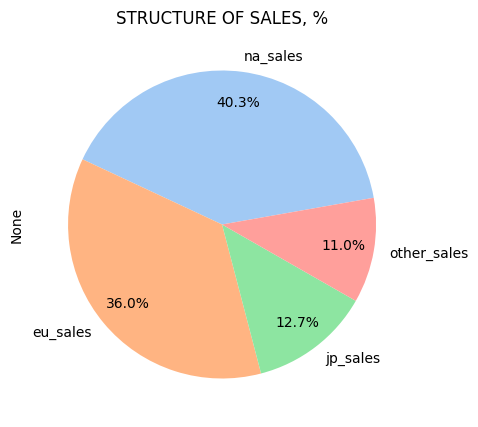

In [51]:
df=data_good[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
df.plot(
    kind='pie', figsize=(5,5), colors=colors, autopct='%1.1f%%', pctdistance=0.8, startangle=10
)
plt.title('STRUCTURE OF SALES, %')
plt.show()

Оказывается, большую часть общих продаж приносят продажи игр в Северной Америке (40,3%). В Европе продается 36 % игр, в Японии лишь 12,7%. На другие регионы приходится 11,0%.  
Сравним какие игровые платформы лидируют по продажам внутри регионов и какие игровые жанры преобладают - составим рейтинг "ТОП-5".    
Для получения портрета пользователя по регионам создадим сводную таблицу `data_good_regions` с общим объемом продаж по каждой платформе в разрезе регионов. Для удобства попутно создадим функцию `pivot_table_regions`, которая будет создавать сводную таблицу с суммарным объемом продаж в разрезе регионов по признаку, который она принимает на вход.

In [52]:
# создаем функцию для группирования данных об объеме продаж по регионам
def pivot_table_regions(value_index):
    data_good_regions = data_good.pivot_table(
    index=value_index, 
    values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], 
    aggfunc='sum'
).reset_index()
    return data_good_regions

# применяем функцию для группировки по плтаформам:
data_good_regions = pivot_table_regions('platform')

Для выведения ретинга ТОП-5 в регионе создадим функцию `top_5_platform` и поочередно применим ее к показателям каждого региона:

In [53]:
def top_5_platform(col):
    # сортируем сводную таблицу и запоминаем 5 лучших показателей
    df = data_good_regions.sort_values(by=col, ascending=False)
    df_top = df.head()
    
    fig, (ax1, ax2)  = plt.subplots(1,2, figsize=(15,5))
    # строим столбчатую диаграмму для 5 платформ с лучшими показателями по региону
    ax1.bar(df_top['platform'], df_top[col])
    ax1.set_title('TOP-5 platform in '+str(col)+' 2016, mln')
    ax1.set_xlabel('platform')
    ax1.set_ylabel('total_sales, mln')
    
    # строим круговую диаграмму с распределениями долей продаж каждой платформы от общего объема продаж по региону
    ax2.pie(df[col], colors=colors, autopct='%1.1f%%', pctdistance=1.11)
    ax2.set_title('Structure of '+str(col)+' 2016 in platform group, %')
    plt.legend(labels=list(df['platform']), frameon=False, bbox_to_anchor=(1, 1))
    plt.show()

Северная америка:


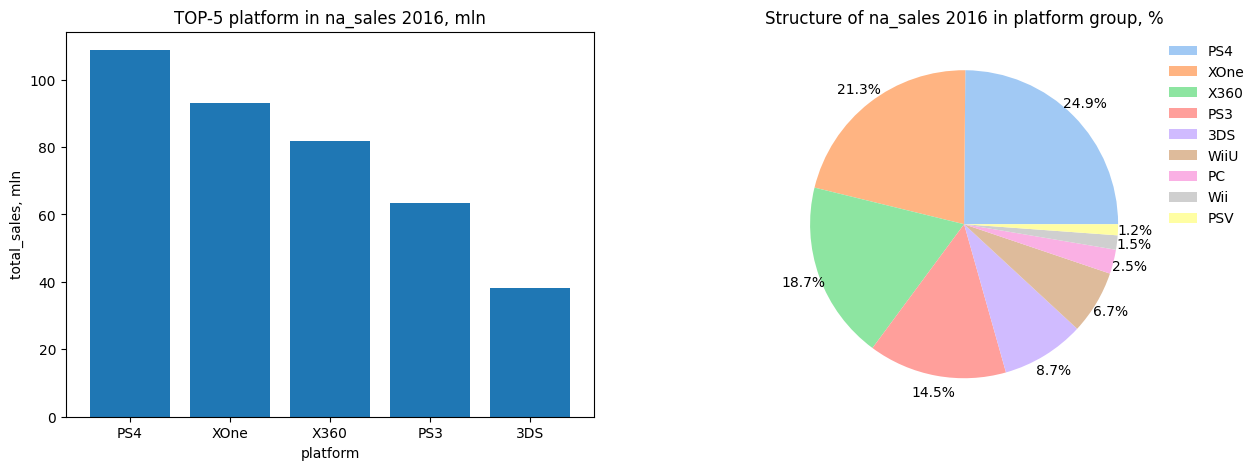

In [54]:
print ('Северная америка:')
top_5_platform('na_sales')

Европа:


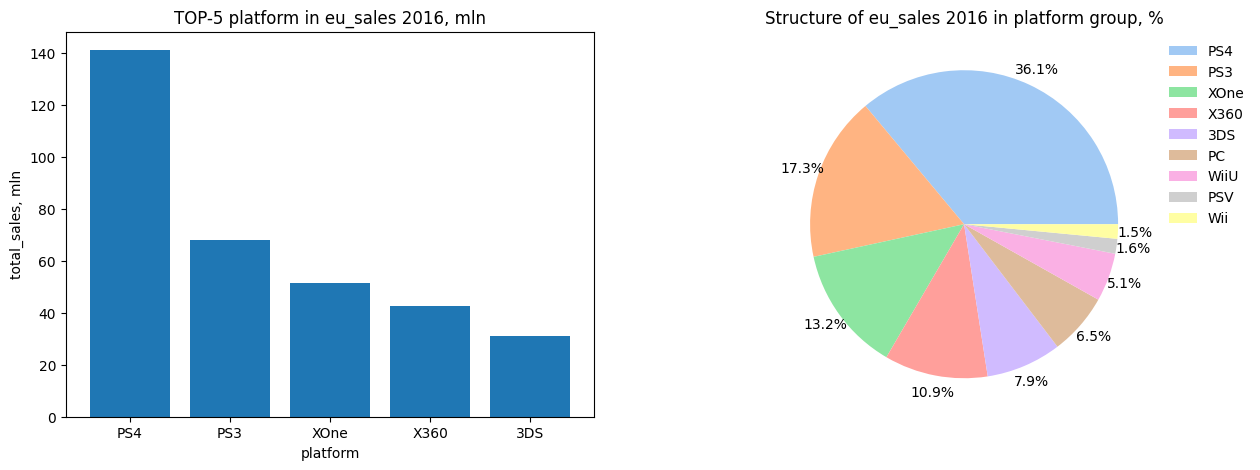

In [55]:
print ('Европа:')
top_5_platform('eu_sales')

Япония:


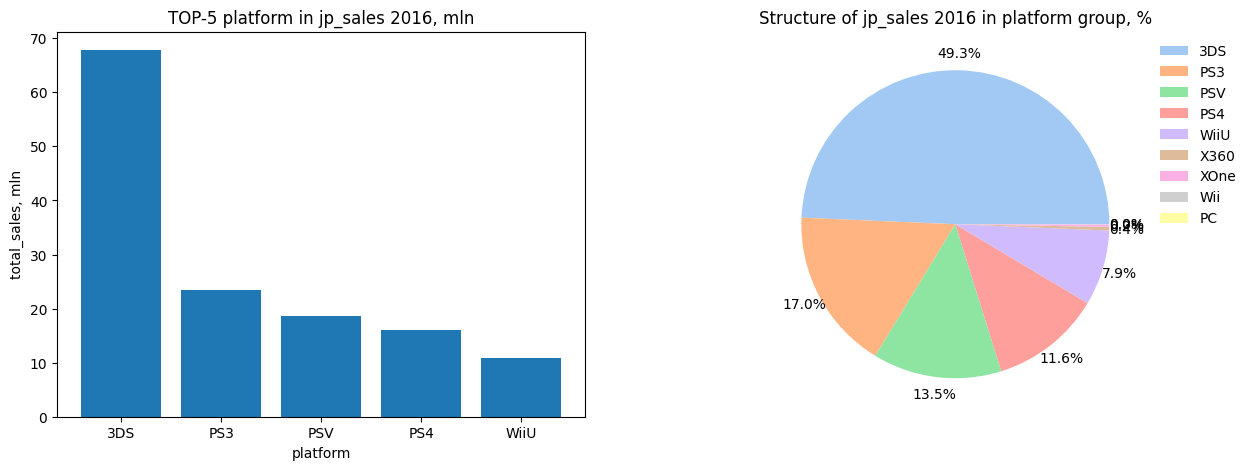

In [56]:
print ('Япония:')
top_5_platform('jp_sales')

Для пользователей **Северной Америки** характерны игры на платформах: "PS4"(25% продаж), "XOne"(21% продаж), "X360"(19% продаж), "PS3" (15% продаж) и "3DS" (9 % продаж). 

**Европейцы** в еще большей мере пользуются играми на платформе "PS4"(36% продаж), в меньшей - "PS3"(19% продаж), также следующими по популярности являются платформы "XOne" (13% продаж), "X360"(11% продаж) и "3DS" (8% продаж).    
В целом, пользователи Америки и Европы похожи в выборе игровых платформ c минимальными отличиями в структуре.  

Если американцы и европейцы в большинстве склонны к использованию платформы "PS4", то от них кардинально отличаются представители **Японии**, которые основной платформой игр считают "3DS" (49% продаж), 17% продаж - игры на платформе "PS3", 14% - "PSV", только 12% - "PS4" и 8% - игры "WiiU".   

 Как известно, Япония является страной высоких технологий, в которой высоко развита электроника и робототехника - возможно, поэтому японцы делают выбор в пользу других игровых консолей.

Изучим объемы продаж регионов в разрезе жанровых предпочтений, применим функцию `pivot_table_regions` к признаку "genre":

In [57]:
data_good_regions = pivot_table_regions('genre')
data_good_regions

,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,Action,117.87,39.65,125.83,37.16,320.51
1,Adventure,8.22,5.11,7.14,2.43,22.90
2,Fighting,8.55,7.63,15.55,3.56,35.29
3,Misc,20.00,9.03,27.46,6.08,62.57
4,Platform,15.15,4.79,17.93,4.07,41.94
5,Puzzle,1.00,1.18,0.83,0.16,3.17
6,Racing,20.19,2.30,12.96,4.44,39.89
7,Role-Playing,36.97,50.01,46.40,11.48,144.86
8,Shooter,87.86,6.61,109.74,28.77,232.98
9,Simulation,10.84,4.52,4.75,1.44,21.55


Для изучения структуры жанров по регионам создадим функцию `top_5_genres`, которая построит круговые диаграммы для каждого региона:

In [58]:
def top_5_genres(col1, col2, col3):
    
    fig, ax = plt.subplots(2,2, figsize=(15,15))
    explode = [0, 0, 0, 0, 0, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
    
    df_top = data_good_regions.sort_values(by=col1, ascending=False)
    ax[0,0].pie(df_top [col1], autopct='%1.1f%%', labels=list(df_top['genre']), explode=explode, pctdistance=0.7)
    ax[0,0].set_title('Structure of genres in  ' +  str(col1)+' 2016, %')

    df_top = data_good_regions.sort_values(by=col2, ascending=False)
    ax[0,1].pie(df_top[col2], autopct='%1.1f%%', labels=list(df_top['genre']), explode=explode, pctdistance=0.7)
    ax[0,1].set_title('Structure of genres in  ' +  str(col2)+' 2016, %')
    
    df_top = data_good_regions.sort_values(by=col3, ascending=False)
    ax[1,0].pie(df_top[col3], autopct='%1.1f%%', labels=list(df_top['genre']), explode=explode, pctdistance=0.7)
    ax[1,0].set_title('Structure of genres in  ' +  str(col3)+' 2016, %')
    
    df_top = data_good_regions.sort_values(by='total_sales', ascending=False)
    ax[1,1].pie(df_top['total_sales'], autopct='%1.1f%%', labels=list(df_top['genre']), explode=explode, pctdistance=0.7)
    ax[1,1].set_title('Structure of genres in  total_sales 2016, %')
    plt.show()

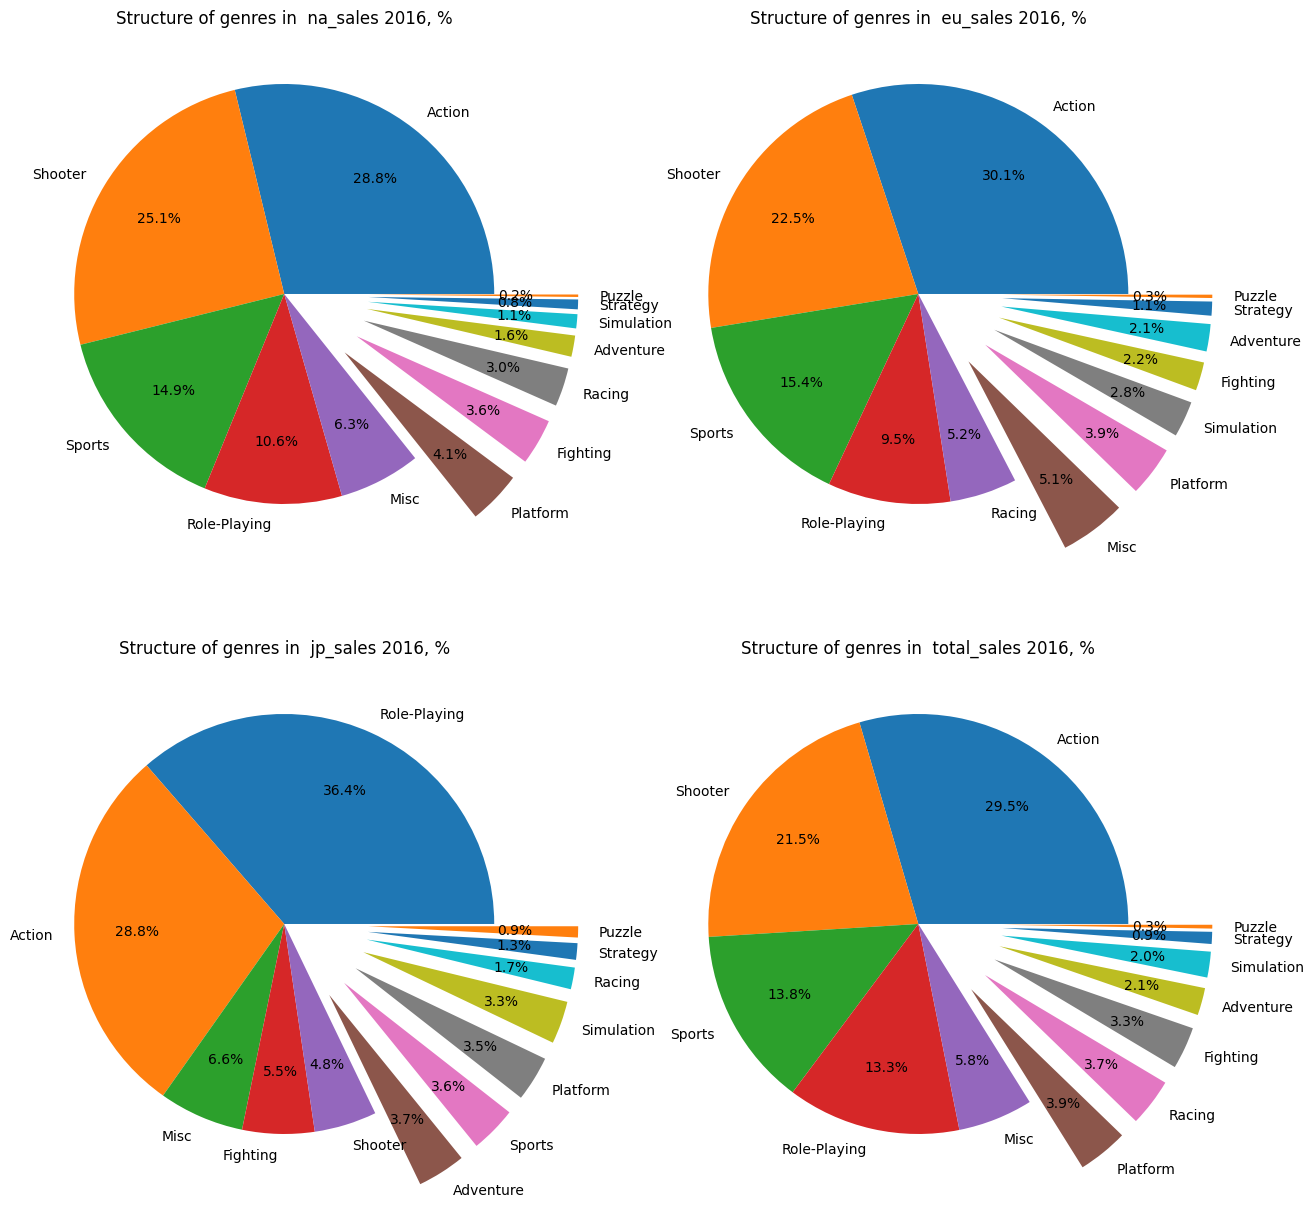

In [59]:
top_5_genres('na_sales', 'eu_sales', 'jp_sales')

Для представителей **Америки** ТОП-5 жанров - это 'Action'(29%), 'Shooter'(25%), 'Sports'(15%), 'Role-Playing'(11%) и 'Misc'(6%)

Для представителей **Европы** ТОП-5 жанпров - это 'Action'(30%), 'Shooter'(23%), 'Sports'(15%), , 'Role-Playing'(10%) и 'Racing'(5%)

Для представителей **Японии** ТОП-5 жанпров - это 'Role-Playing'(36%), 'Action'(29%), 'Misc'(7%) , 'Fighting'(6%), 'Shooter'(5%).

Из полученных результатов следует, что **пользователи Японии имеют отличия от пользователей Америки и Европы и в жанровых предпочтениях.** Так, если американцы и европейцы больше всего в играх любят жанр "экшен" и "пострелять", то в Японии предпочитают жанр ролевых компьютерных игр, в то время как в других регионах они находятся на 4 месте в рейтинге.   
Интересно, что спортивные игры вовсе не входят в ТОП-5 Японии, а для Европы и Америки - это 15% продаж. Также в Европе любят и гоночные игры, которые в других регионах в ТОП-5 не входят. В Америке гонкам предпочитают игры-аркады.

Для того чтобы выяснить как влияет рейтинг ESRB на продажи в отдельном регионе построим столбчатую диаграмму в разрезе регионов, предварительно сгруппировав датасет по рейтингу c помощью функции `pivot_table_regions`.

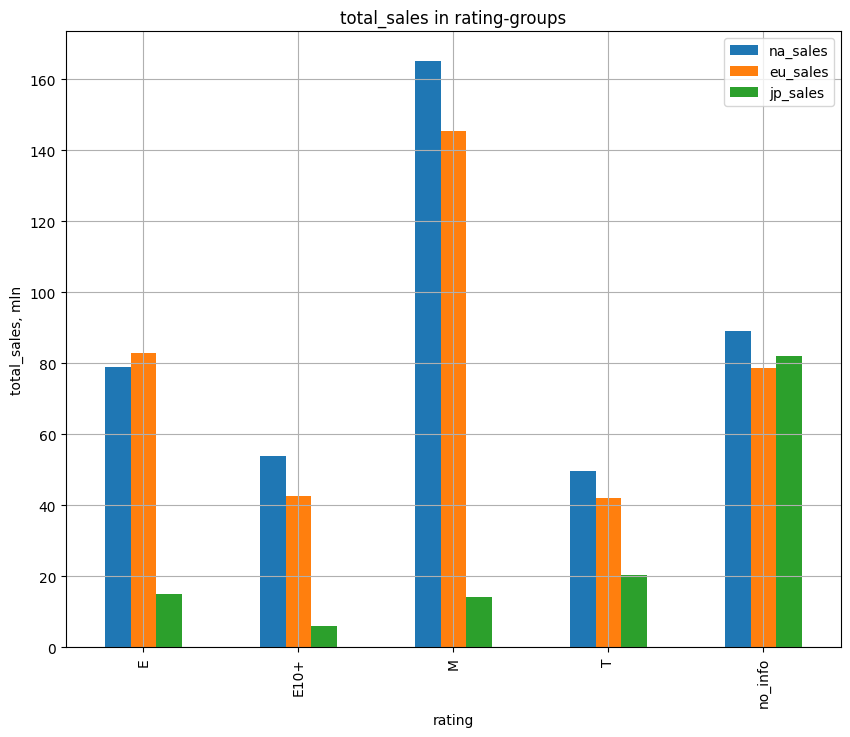

In [60]:
data_good_regions = pivot_table_regions('rating')
data_good_regions.plot(kind='bar', x='rating', y=['na_sales', 'eu_sales', 'jp_sales'], figsize=(10,8), grid=True)
plt.title('total_sales in rating-groups')
plt.ylabel('total_sales, mln')
plt.show()

Наблюдаем практически полное отсутствие зависимости объема продаж от рейтинга ESBR в Японии, так как большая часть проданных копий игр приходится на игры без такого рейтинга. Вероятно, это обусловлено тем, что жители Японии не ориентируются на рейтинги чужих стран, а смотрят на рейтинговые ограничения своего государства - данных о которых в исследуемом датасете нет (напомним, что ESBR - организация для рейтингов в США и в Канаде).    
Что касается продаж в Америке, то большая часть проданных копий приходится на игры категории "М"(для лиц старше 17 лет), также, как и в Европе.   
Стоит отметить, что в Америке и в Европе не смотря на отсутствие рейтинга ESBR игры тоже продаются (за 2013-2016 годы объем их продаж составил около 80 млн. копий).

**Выводы:**   

Портреты пользователя разных регионов составлены. В результате можно говорить о глобальном отличии пользователя Японии от пользователя Европы или Америки.   
Если для пользователя Европы или Америки "топовыми" являются игры в жанре "Action" или "Shooter" на платформе "PS4", то для пользователя Японии - это, скорее всего, игра в жанре "Role-Playing" на платформе "3DS".  
Что касается рейтинга ESBR, то в Америке, вероятность продать игру с рейтингом "M" выше, чем игру другой категории; в Европе наиболее часто также покупают игры категорий "М", а в Японии продажи игр от такого рейтинга практически не зависят.

### Проверка гипотез

**Проверка гипотезы**: *Средние пользовательские рейтинги платформ XOne и PC одинаковые*;

```
H_0: Средний пользовательский рейтинг ('user_score') платформы "XOne" = Средний пользовательский рейтинг ('user_score') платформы "PC"`
H_1: Средний пользовательский рейтинг ('user_score') платформы "XOne" ≠ Средний пользовательский рейтинг ('user_score') платформы "PC"`
```
Но прежде, чем начать проверку гипотез необходимо будет исключить нулевые значения из исследования, которыми мы заменяли игры с рейтингом "tbd", чтобы они не повлияли на результат. 

In [61]:
data_good_stat = (data_good[data_good['user_score'] != 0])

In [62]:
# вызовем метод для проверки гипотезы
results = st.ttest_ind(
    data_good_stat[data_good_stat['platform'] =='XOne']['user_score'], 
    data_good_stat[data_good_stat['platform'] =='PC']['user_score'], 
    equal_var=False,
    nan_policy='omit'
)

# задаем значение уровня значимости
alpha = .05

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

0.1475959401343032
Не получилось отвергнуть нулевую гипотезу 


**Проверка гипотезы:** 	*Средние пользовательские рейтинги жанров Action и Sports различаются;*

```
H_0: Средний пользовательский рейтинг ('user_score') жанра "Action" = Средний пользовательский рейтинг ('user_score')       жанра "Sports" `
H_1: Средний пользовательский рейтинг ('user_score') жанра "Action" ≠ Средний пользовательский рейтинг ('user_score')       жанра "Sports" ``
```

In [63]:
# вызовем метод для проверки гипотезы
results = st.ttest_ind(
    data_good_stat[data_good_stat['genre'] =='Action']['user_score'], 
    data_good_stat[data_good_stat['genre'] =='Sports']['user_score'], 
    equal_var=False,
    nan_policy='omit'
)

# задаем значение уровня значимости
alpha = .05

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.4191414517472358e-20
Отвергаем нулевую гипотезу


**Выводы:**

Проверив гипотезу о равенстве оценок пользователей двух платформ - можно говорить о том, что нулевая гипотеза не отвергнута и оценка пользователя не зависит от того, какую игровую платформу он использует: "XOne" или "РС".

Проверив гипотезу о равенстве оценок пользователя по двум жанрам - пришлось отвергнуть нулевую гипотезу. Оказывается, оценка пользователя зависит от игрового жанра: "Action" или "Sports".

### Выводы по исследованию

Для исследования были взяты исторические данные за 37 лет, на котоорых мы смогли убедиться в том, что компьютерные технологии развиваются стремительными темпами, и, в частности, продукты игровой индустрии быстро изменяются. Ввиду такой динамичности развития игровые платформы имеют особенность устаревать и исчезать. Средняя продолжительность "жизни" платформы по исходным данным составляет 7 лет. В связи с высокой динамикой изменений исследование проведено на играх, выпущенных в 2013-2016 гг.   

В процессе исследования проверили 2 гипотезы:
1. Средние пользовательские рейтинги платформ "XOne" и "РС" одинаковые. Гипотеза не была отвергнута, оказывается, оценка пользователя не зависит от того, какая платформа используется: "XOne" или "РС".
2. Средние пользовательские рейтинги жанров "Action" и "Sports" различаются. Нулевую гипотезу о равенстве пришлось отвергнуть в пользу альтернативной. Оказывается, оценка пользователя зависит от игрового жанра: "Action" или "Sports".  

Стоит отметить, что при изучении объема продаж прослеживается тенденция к снижению объемов продаж в целом, вне зависимости от того какая платформа используется.   
Основной целью исследования было выявить закономерности, определяющие успешность игры. Таким образом, в общем случае, потенциально успешными в 2017 году могут стать:    
а) продукты на платформах "PS4", "XOne" и "3DS";    
b) игры в жанрах 'Shooter', 'Sports' и 'Role-Playing'. 

В выборе наиболее перспективного продукта следует обратить внимание на региональную принадлежность пользователя, поскольку вкусовые предпочтения, особенности развития региона и его потребности различаются.   
Так, **для пользователя Америки** наиболее перспективными будут сочетания:   
среди платформ - 'PS4', 'XOne', 'X360', 'PS3' и '3DS'  
среди жанров - 'Action', 'Shooter', 'Sports', 'Role-Playing' и 'Misc'.   
**для пользователя Европы** наиболее перспективными будут сочетания:   
среди платформ - 'PS4', 'PS3', 'XOne', '3DS' и 'X360'   
среди жанров - 'Action', 'Shooter', 'Sports', , 'Role-Playing' и 'Racing'.  
**для пользователя Японии** наиболее перспективными будут сочетания:   
среди платформ - '3DS', PS3', 'PSV','PS4', 'WiiU'   
среди жанров -  'Role-Playing', 'Action', 'Misc', 'Fighting' и'Shooter'.     
Что интересно, пользователь Японии кардинально отличается от пользователей Европы и Америки - это стоит учитывать при выборе направлений реализации продукта.   
При изучении возрастного рейтинга ESBR выявлены следующие особенности:
- В Америке вероятность продать игру с рейтингом "М" выше, чем игру с другим рейтингом;   
- В Европе наиболее часто покупают игры категорий "М" и "Е";
- В Японии продажи игр от такого рейтинга практически не зависят.

Важно отметить, что оценка критиков находится в прямой линейной связи с объемом продаж, но теснота связи невысокая, поэтому говорить о закономерности не приходится, в то время как оценка пользователя с объемом продаж линейно не связана вовсе.




